### This notebook is for testing the Generalizability of our classification models on human tissue on different damage features 
The data is collected from https://respiratory-research.biomedcentral.com/articles/10.1186/s12931-021-01628-9 by Iran.
The images had some watermarks, required to remove before run prediction code.

Salma


#### The following cell is for removing scanner watermark from images

I tried 1) cv2.inpaint method and also 2) subtracting watermark from image.

### The following cell is for removing watermarks from images with cv2 package

In [ ]:
## We had different pannels sepratated by main cause of death
#imgs = glob.glob('../../../data/covid_patients/Pannel_A_AcuteDAD/*.tiff')
#imgs = glob.glob('../../../data/covid_patients/Pannel_B_FibroproliferativeDAD/*.tiff')
#imgs = glob.glob('../../../data/covid_patients/Pannel_CD_MixedDAD/*.tiff')
#mgs = glob.glob('../../../data/covid_patients/Pannel_E_Hemorrhage/*.tiff')
#imgs = glob.glob('../../../data/covid_patients/Pannel_F_Pneumonia/*.tiff')
#imgs = glob.glob('../../../data/covid_patients/Pannel_G_ThrombusLarge/*.tiff')
imgs = glob.glob('../../../data/covid_patients/Pannel_H_ThrombusSmall/*.tiff')

In [19]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
print(imgs)
for i in imgs:
    k = cv2.imread(i)

    mask = cv2.imread('../../../data/covid_patients/watermark.tiff', cv2.IMREAD_GRAYSCALE)  ## The watermark on an empty image
    c = np.where((mask>200)&(mask<243),233, 0).astype(np.uint8)
    
    dst = cv2.inpaint(k[:,:,2],c,1,cv2.INPAINT_TELEA)
    new_img   = cv2.merge([k[:,:,0],k[:,:,1],dst])
    #plt.imshow(new_img)
    cv2.imwrite(i.replace('.tiff','_new.tiff'), new_img)
 

['../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972176212.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972183769.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972190993.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972199348.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972216116.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972222477.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972230245.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972240677.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972248638.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972264685.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972274201.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972282724.tiff', '../../../data/covid_patients/Pannel_H_ThrombusSmall\\1692972291360.tiff', '../../../data/covid_pat

### The following cell is for removing watermarks by subtracting the watermark from all image.

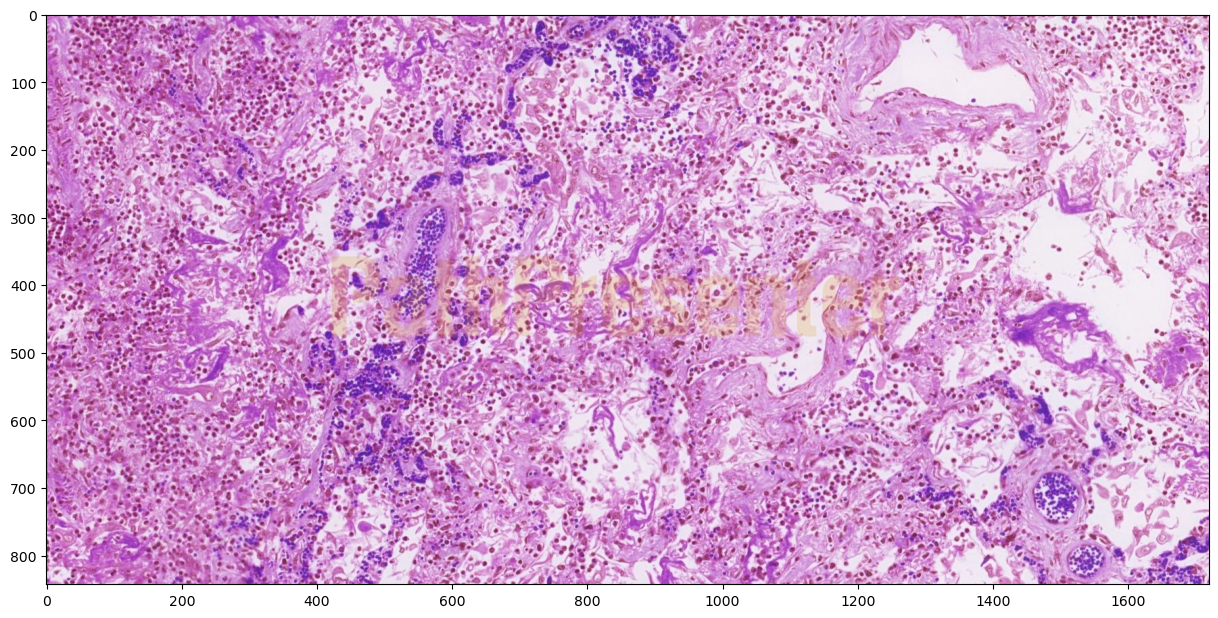

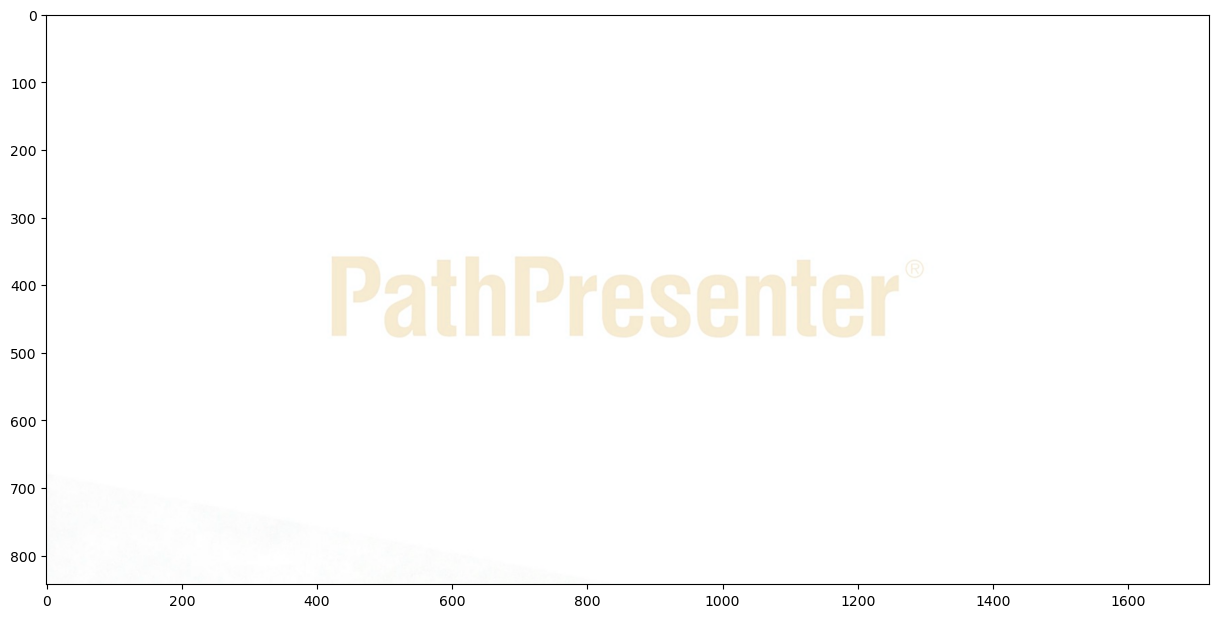

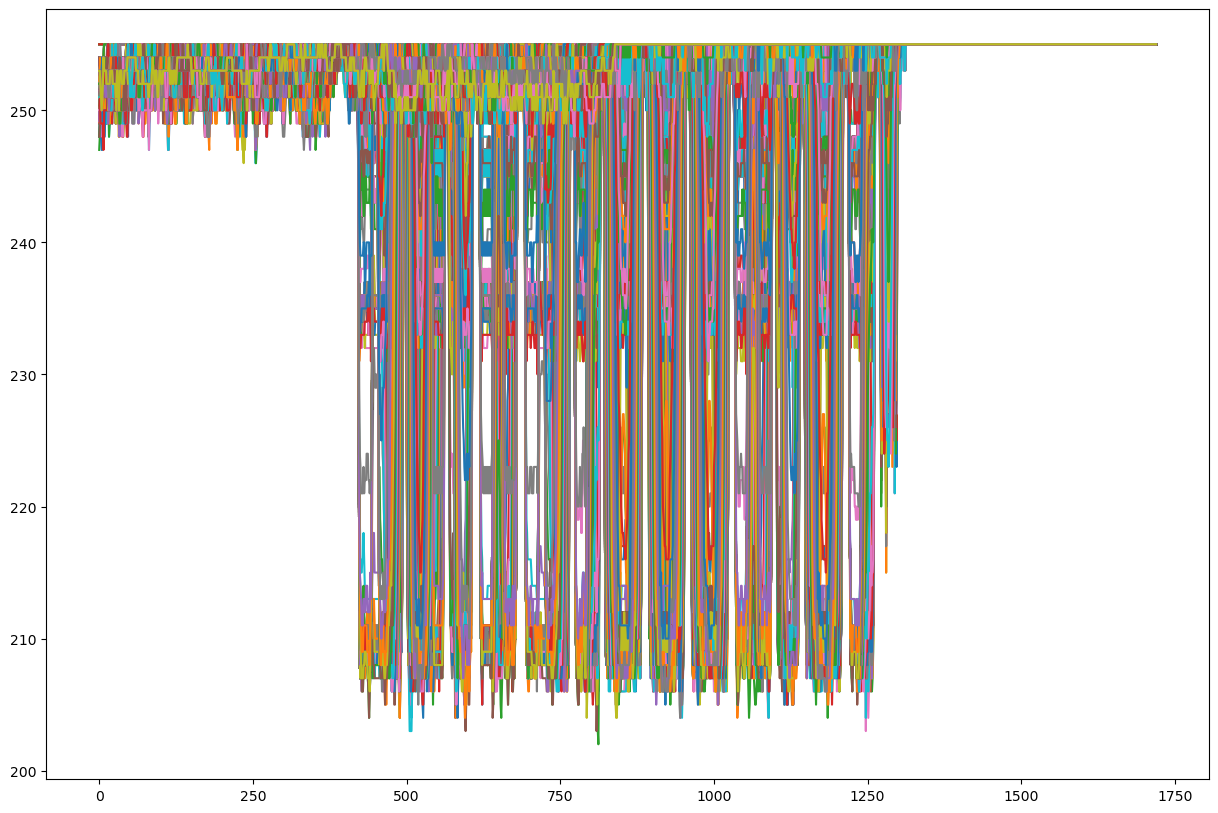

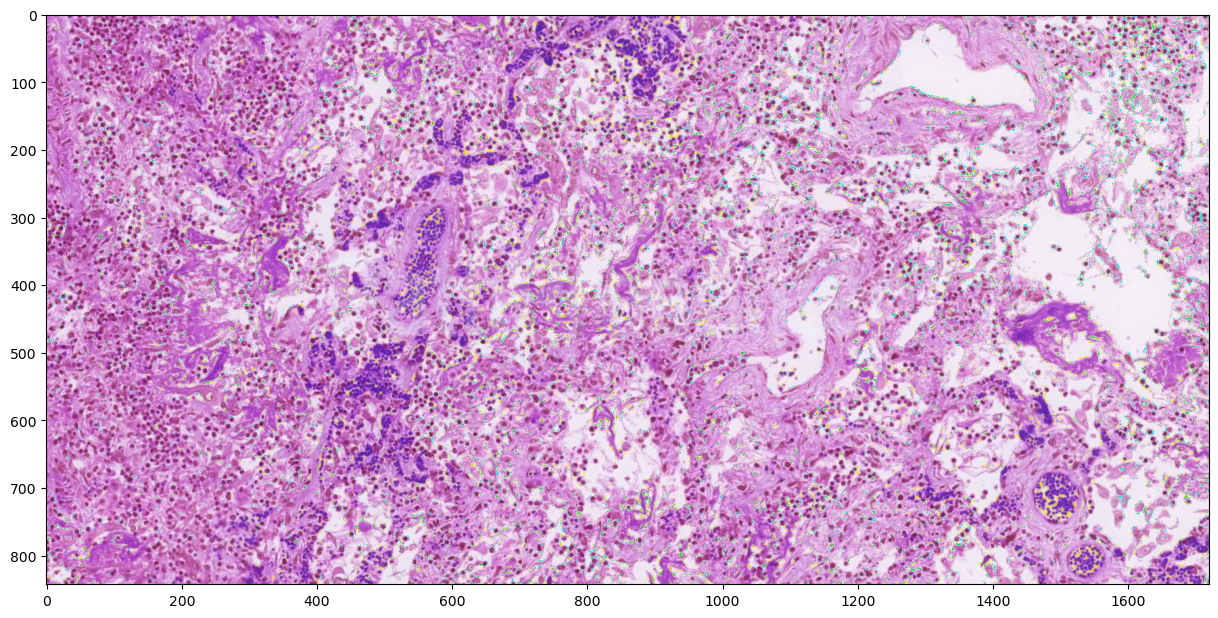

In [70]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

imgs = glob.glob('../../data/covid_patients/Pannel_A_AcuteDAD/*.tiff')

for i in imgs[0:1]:
    k = cv2.imread(i)
    
    plt.figure(figsize=(15,10))
    plt.imshow(k)
    plt.savefig('original_img.tiff')
    

    mask = cv2.imread('../../data/covid_patients/watermark.tiff')
    plt.figure(figsize=(15,10))
    plt.imshow(mask)
    
    c = np.where((mask>=245),255, mask).astype(np.uint8)
    plt.figure(figsize=(15,10))
    for n in mask:
        plt.plot(n)
    new_img = k - c
    plt.figure(figsize=(15,10))
    plt.imshow(new_img)
    plt.savefig('new_test_subtract.tiff')
    
   

In [21]:
import os
main_data_dir = '../../../data/covid_patients/'
image_dir  =[x[0] for x in os.walk(main_data_dir)][1:]
image_dir[:7]

['C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_A_AcuteDAD',
 'C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_B_FibroproliferativeDAD',
 'C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_CD_MixedDAD',
 'C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_E_Hemorrhage',
 'C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_F_Pneumonia',
 'C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_G_ThrombusLarge',
 'C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_H_ThrombusSmall']

### Crop all images into 224x224 tile

In [33]:
import math
import os

for d in image_dir:
    imgs = glob.glob(d+'/*_new.tiff')
    cropped_d  = d+'_cropped/'
    if not os.path.exists(cropped_d):
        os.makedirs(cropped_d)
    for k in imgs:
        img = cv2.imread(k)
        img_shape = img.shape
        tile_size = (224, 224)
        offset = (224, 224)
        img_name = k.split('\\')[1]
   
        for i in range(int(math.floor(img_shape[0]/(offset[1] * 1.0)))):
            for j in range(int(math.floor(img_shape[1]/(offset[0] * 1.0)))):
                cropped_img = img[offset[1]*i:min(offset[1]*i+tile_size[1], img_shape[0]), offset[0]*j:min(offset[0]*j+tile_size[0], img_shape[1])]
                # Debugging the tiles
               
                name = img_name.replace('.tiff','__')
                if cropped_img.shape[0]<tile_size[0] or cropped_img.shape[1]<tile_size[1]:
                    shape = np.shape(cropped_img)
                    zero_pad_cropped_img=np.ones((224,224,3),dtype=int)*255
                    zero_pad_cropped_img[:shape[0],:shape[1]]=cropped_img
                    cv2.imwrite(d+'_cropped/'+ name + str(i) + "_" + str(j) + ".tiff", zero_pad_cropped_img)
                    fig.tight_layout() 
                else:    
                    check= cv2.imwrite(d+'_cropped/'+ name + str(i) + "_" + str(j) + ".tiff", cropped_img)
                    
        
    print(d,'done')

C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_A_AcuteDAD
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_A_AcuteDAD done
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_B_FibroproliferativeDAD
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_B_FibroproliferativeDAD done
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_CD_MixedDAD
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_CD_MixedDAD done
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_E_Hemorrhage
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_E_Hemorrhage done
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_F_Pneumonia
C:/ImageProject_files/Histology/code/Three_class_files/data/covid_patients/Pannel_F_Pneumonia done
C:/ImagePro

In [ ]:
## Libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, Flatten, Input, MaxPooling2D, Activation, BatchNormalization, Concatenate, Dropout, Add, Dense,LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
from tensorflow.keras.utils import plot_model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from keras.models import model_from_json
from myplot import multi_plot
from pathlib import Path
from tensorflow.keras.utils import plot_model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense, Lambda
from keras.models import Model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import cv2
from pathlib import Path
from tensorflow.keras.utils import plot_model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from keras.models import model_from_json
from myplot import multi_plot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.python.keras.layers import InputSpec, Layer

import pandas as pd
from sklearn.metrics import classification_report
from keras.models import Model, model_from_json

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB4,EfficientNetB7
import os
##https://neptune.ai/blog/keras-metrics
from keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_precision_recall, plot_precision_recall_curve

In [ ]:
## Models and function used in model definition
######################################################################################################
class MulticlassTruePositives(tf.keras.metrics.Metric):
    def __init__(self, name='multiclass_true_positives', **kwargs):
        super(MulticlassTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        values = tf.cast(y_true, 'int32') == tf.cast(y_pred, 'int32')
        values = tf.cast(values, 'float32')
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, 'float32')
            values = tf.multiply(values, sample_weight)
        self.true_positives.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.true_positives

    def reset_state(self):
        self.true_positives.assign(0.)

## Model definition
#################################################################################################################################
def pretrained_model_func(img_shape, num_classes,layer_type):
    model_conv = VGG16(weights='imagenet', include_top=False)  ## It could be other models such as EffnetB4 or ..

    #Input format
    keras_input = Input(shape=(224,224,3), name = 'image_input')
    
    #Use the generated model 
    output_conv = model_conv(keras_input)
    
    for layer in model_conv.layers:
        layer.trainable = False
    
    #Add the fully-connected layers 
    x = Flatten(name='flatten')(output_conv)
    x = Dense(128, activation=layer_type, name='fc1')(x)
    x = Dense(128, activation=layer_type, name='fc2')(x)
    x = Dropout(0.5, name='dropout')(x)
    x = Dense(num_classes, activation='softmax', name='predictions')(x)
    
    METRICS = [
      keras.metrics.SparseCategoricalAccuracy(),
      MulticlassTruePositives()]
    
    
    #Create your own model 
    pretrained_model = Model(inputs=keras_input, outputs=x)
    pretrained_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=METRICS)
    #pretrained_model.summary()

    return pretrained_model


#######################################################################

In [ ]:

#model_name       = 'EffnetB4_man_aug_1st' ## 1st and 2nd
model_name       = 'vgg16_rnd_aug_3rd' ## 1st and 2nd 
validation_DATA_PATH  =  '../../../Three_class_files/data/covid_patients/'
validation_dirs        = [x[0] for x in os.walk(validation_DATA_PATH)][1:]


In [6]:

for d in validation_dirs:
    if '_cropped' in d:
        input_shape = (224,224,3)
        validation_images = glob.glob(d+'/*.tiff')
        #print(validation_images)
        n_v= len(validation_images) 
        print(n_v)
        validation_samples = np.zeros((n_v, input_shape[0], input_shape[1], 3), dtype=np.float32)
        image_names = []



        for ctr,line in zip(range(n_v),validation_images):
            validation_samples[ctr,:,:,:] = cv2.imread(line)
            image_names.append(line.split('\\')[-1])  


        for i in range(n_v):
            mod_img = validation_samples[i,:, :].astype(np.float32)
            validation_samples[i, :, :, :] = mod_img


        pretrained_model = pretrained_model_func(input_shape, 3,'relu') ## REGRESSION: number of classes 1 instead of 3
        weights =glob.glob('../../../models/initial_relu/3fold_CV/vgg_aug_3fold/3rd_part_best_weights.01-4.22.hdf5')  ## best model
        print(weights)
        # Load weights, select between best_weights (val_accuracy) 
        
        pretrained_model.load_weights(weights[0])

        # Make predictions on validation samples
        #with tf.device('/CPU:0'):  ## run on cpu or gpu
        preds = pretrained_model.predict(validation_samples)

        
        # Max predictions in numpy array
        y_pred = np.argmax(preds,axis=1)  # 0,1 or 2
        x_l = range(len(y_pred))

        ################################################################
        ### Here all predicted labels are saved in the following file
        with open(d + model_name+'_'+'_validation_predicted_newlabels.txt','w') as fout: 
            for i,line in zip(y_pred,image_names):
                print(line,int(i),sep=' ',file=fout)
            fout.close()




777
['../../../models/initial_relu/3fold_CV/vgg_aug_3fold/3rd_part_best_weights.01-4.22.hdf5']
630
['../../../models/initial_relu/3fold_CV/vgg_aug_3fold/3rd_part_best_weights.01-4.22.hdf5']
756
['../../../models/initial_relu/3fold_CV/vgg_aug_3fold/3rd_part_best_weights.01-4.22.hdf5']
357
['../../../models/initial_relu/3fold_CV/vgg_aug_3fold/3rd_part_best_weights.01-4.22.hdf5']
441
['../../../models/initial_relu/3fold_CV/vgg_aug_3fold/3rd_part_best_weights.01-4.22.hdf5']
441
['../../../models/initial_relu/3fold_CV/vgg_aug_3fold/3rd_part_best_weights.01-4.22.hdf5']
588
['../../../models/initial_relu/3fold_CV/vgg_aug_3fold/3rd_part_best_weights.01-4.22.hdf5']


### This cell is for plotting the predicted tile score on the images

### The following cell is for merging tile prediction coming from three different models

In [40]:
from statistics import mode

for d in validation_dirs:
    if '_cropped' in d:
        with open(d+ 'EffnetB4_man_aug_agg__validation_predicted_newlabels.txt','w') as fg:
            with open(d+ 'EffnetB4_man_aug_ensembled__validation_predicted_newlabels.txt','w') as ft:
                with open(d+ 'EffnetB4_man_aug_1st__validation_predicted_newlabels.txt','r') as f1:
                        with open(d+'EffnetB4_man_aug_2nd__validation_predicted_newlabels.txt','r') as f2:
                            with open(d+'EffnetB4_man_aug_3rd__validation_predicted_newlabels.txt','r') as f3:
                                for l1,l2,l3 in zip(f1,f2,f3):
                                    tile_name = l1.split()[0]
                                    p_s_1 = l1.split()[1]
                                    p_s_2 = l2.split()[1]
                                    p_s_3 = l3.split()[1]
                                    print(tile_name,p_s_1,p_s_2,p_s_3,sep=' ',file = ft)
                                    print(tile_name,mode([p_s_1,p_s_2,p_s_3]),sep=' ',file = fg)



#### E_m_a  colors

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from pathlib import Path
from PIL import Image
import os


from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import Callback
from keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout,LeakyReLU
from keras.models import Model, model_from_json

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import classification_report, confusion_matrix


for d in validation_dirs:
    if '_cropped' in d:
        validation_DATA_PATH  = d
        validation_COLORED_PATH  = d.replace('cropped','E_m_a_colored_agg')

        if not os.path.exists(validation_COLORED_PATH):
            os.makedirs(validation_COLORED_PATH)
        validtion_ORIGINAL_PATH  = d.replace('_cropped','')


        f_orig = glob.glob(validtion_ORIGINAL_PATH+'/*_new.tiff')

        tile_index = ''
        score_class = {'0':'low','1':'medium','2':'high'}
        for line in f_orig:
            main_img_size      = cv2.imread(line).shape
            main_img           = cv2.imread(line).astype(np.float32)
            #color_score_matrix = np.ones([main_img_size[0],main_img_size[1],3])
            color_score_matrix = np.zeros([int(np.floor(main_img_size[0]/224)*224),int(np.floor(main_img_size[1]/224)*224),3])

            main_img_name      = line.replace('.tiff','').split('\\')[-1]
            with open(validation_DATA_PATH+'EffnetB4_man_aug_agg__validation_predicted_newlabels.txt','r') as f_pred:
                caption = []
                for line_pred in f_pred:
                    tile_index    = line_pred.split()[0].split('__')[0]
                    if tile_index == main_img_name:
                        tile_row  = int(line_pred.split()[0].split('__')[1].replace('.tiff','').split('_')[0])
                        tile_col  = int(line_pred.split()[0].split('__')[1].replace('.tiff','').split('_')[1])
                        temp_score = int(line_pred.split()[1])
                        if temp_score==0:
                            r_ =0
                            g_ =0
                            b_ =0
                        elif temp_score ==1:
                            r_ = 1
                            g_ = 1
                            b_ = 1
                        else:
                            r_ = 2
                            g_ = 2
                            b_ = 2
                        color_score_matrix[tile_row*224:(tile_row+1)*224,tile_col*224:(tile_col+1)*224,0]= 60*r_
                        color_score_matrix[tile_row*224:(tile_row+1)*224,tile_col*224:(tile_col+1)*224,1]= 60*g_
                        color_score_matrix[tile_row*224:(tile_row+1)*224,tile_col*224:(tile_col+1)*224,2]= 60*b_
                        caption.append(score_class[line_pred.split()[1]])

                    else:
                        continue

            sh      =         np.shape(color_score_matrix)
            main_tiles_scored =main_img[0:sh[0],0:sh[1],:]-color_score_matrix
            main_tiles_scored  = np.clip(main_tiles_scored,0,255)
            main_tiles_scored /=255

            #super_imposed_img = cv2.addWeighted(main_img.astype(np.uint8), 0.7, color_score_matrix.astype(np.uint8), 0.3,0)
            #plt.figure()
            plt.title('predicted class:{}'.format(caption))
            plt.imshow(main_tiles_scored)
            caption = []
            plt.savefig(validation_COLORED_PATH+'/'+main_img_name)


        #main_img_scored=main_img+color_score_matrix


    

In [7]:
from statistics import mode

for d in validation_dirs:
    if '_cropped' in d:
        with open(d+ 'EffnetB4_rnd_aug_agg__validation_predicted_newlabels.txt','w') as fg:
            with open(d+ 'EffnetB4_rnd_aug_ensembled__validation_predicted_newlabels.txt','w') as ft:
                with open(d+ 'effnetB4_rnd_aug_1st__validation_predicted_newlabels.txt','r') as f1:
                        with open(d+'effnetB4_rnd_aug_2nd__validation_predicted_newlabels.txt','r') as f2:
                            with open(d+'effnetB4_rnd_aug_3rd__validation_predicted_newlabels.txt','r') as f3:
                                for l1,l2,l3 in zip(f1,f2,f3):
                                    tile_name = l1.split()[0]
                                    p_s_1 = l1.split()[1]
                                    p_s_2 = l2.split()[1]
                                    p_s_3 = l3.split()[1]
                                    print(tile_name,p_s_1,p_s_2,p_s_3,sep=' ',file = ft)
                                    print(tile_name,mode([p_s_1,p_s_2,p_s_3]),sep=' ',file = fg)


In [8]:
for d in validation_dirs:
    if '_cropped' in d:
        with open(d+ 'vgg16_rnd_agg__validation_predicted_newlabels.txt','w') as fg:
            with open(d+ 'vgg16_rnd_aug_ensembled__validation_predicted_newlabels.txt','w') as ft:
                with open(d+ 'vgg16_rnd_aug_1st__validation_predicted_newlabels.txt','r') as f1:
                        with open(d+'vgg16_rnd_aug_2nd__validation_predicted_newlabels.txt','r') as f2:
                            with open(d+'vgg16_rnd_aug_3rd__validation_predicted_newlabels.txt','r') as f3:
                                for l1,l2,l3 in zip(f1,f2,f3):
                                    tile_name = l1.split()[0]
                                    p_s_1 = l1.split()[1]
                                    p_s_2 = l2.split()[1]
                                    p_s_3 = l3.split()[1]
                                    print(tile_name,p_s_1,p_s_2,p_s_3,sep=' ',file = ft)
                                    print(tile_name,mode([p_s_1,p_s_2,p_s_3]),sep=' ',file = fg)


In [9]:
from statistics import mode
for d in validation_dirs:
    if '_cropped' in d:
        with open(d+'T_3_t_agg__validation_predicted_newlabels.txt','w') as fg:
            with open(d+'T_3_t_ensembled__validation_predicted_newlabels.txt','w') as ft:
                with open(d+ 'vgg16_rnd_agg__validation_predicted_newlabels.txt','r') as f1:
                        with open(d+ 'EffnetB4_rnd_aug_agg__validation_predicted_newlabels.txt','r') as f2:
                            with open(d+ 'EffnetB4_man_aug_agg__validation_predicted_newlabels.txt','r') as f3:
                                for l1,l2,l3 in zip(f1,f2,f3):
                                    tile_name = l1.split()[0]
                                    p_s_1 = l1.split()[1:]
                                    p_s_2 = l2.split()[1:]
                                    p_s_3 = l3.split()[1:]
                                    all_scores_list  = p_s_1+p_s_2+p_s_3

                                    print(tile_name,*all_scores_list,file = ft)

                                    print(tile_name,mode(p_s_1+p_s_2+p_s_3),sep=' ',file = fg)


## T_3_t ensembled model colors

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from pathlib import Path
from PIL import Image
import os


from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import Callback
from keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout,LeakyReLU
from keras.models import Model, model_from_json

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import classification_report, confusion_matrix


for d in validation_dirs:
    if '_cropped' in d:
        validation_DATA_PATH  = d
        validation_COLORED_PATH  = d.replace('cropped','_T_3_colored_agg')

        if not os.path.exists(validation_COLORED_PATH):
            os.makedirs(validation_COLORED_PATH)
        validtion_ORIGINAL_PATH  = d.replace('_cropped','')


        f_orig = glob.glob(validtion_ORIGINAL_PATH+'/*_new.tiff')

        tile_index = ''
        score_class = {'0':'low','1':'medium','2':'high'}
        for line in f_orig:
            main_img_size      = cv2.imread(line).shape
            main_img           = cv2.imread(line).astype(np.float32)
            #color_score_matrix = np.ones([main_img_size[0],main_img_size[1],3])
            color_score_matrix = np.zeros([int(np.floor(main_img_size[0]/224)*224),int(np.floor(main_img_size[1]/224)*224),3])

            main_img_name      = line.replace('.tiff','').split('\\')[-1]
            with open(validation_DATA_PATH+'T_3_t_agg__validation_predicted_newlabels.txt','r') as f_pred:
                caption = []
                for line_pred in f_pred:
                    tile_index    = line_pred.split()[0].split('__')[0]
                    if tile_index == main_img_name:
                        tile_row  = int(line_pred.split()[0].split('__')[1].replace('.tiff','').split('_')[0])
                        tile_col  = int(line_pred.split()[0].split('__')[1].replace('.tiff','').split('_')[1])
                        temp_score = int(line_pred.split()[1])
                        if temp_score==0:
                            r_ =0
                            g_ =0
                            b_ =0
                        elif temp_score ==1:
                            r_ = 1
                            g_ = 1
                            b_ = 1
                        else:
                            r_ = 2
                            g_ = 2
                            b_ = 2
                        color_score_matrix[tile_row*224:(tile_row+1)*224,tile_col*224:(tile_col+1)*224,0]= 60*r_
                        color_score_matrix[tile_row*224:(tile_row+1)*224,tile_col*224:(tile_col+1)*224,1]= 60*g_
                        color_score_matrix[tile_row*224:(tile_row+1)*224,tile_col*224:(tile_col+1)*224,2]= 60*b_
                        caption.append(score_class[line_pred.split()[1]])

                    else:
                        continue

            sh      =         np.shape(color_score_matrix)
            main_tiles_scored =main_img[0:sh[0],0:sh[1],:]-color_score_matrix
            main_tiles_scored  = np.clip(main_tiles_scored,0,255)
            main_tiles_scored /=255

            #super_imposed_img = cv2.addWeighted(main_img.astype(np.uint8), 0.7, color_score_matrix.astype(np.uint8), 0.3,0)
            #plt.figure()
            plt.title('predicted class:{}'.format(caption))
            plt.imshow(main_tiles_scored)
            caption = []
            plt.savefig(validation_COLORED_PATH+'/'+main_img_name)


        #main_img_scored=main_img+color_score_matrix


    